The model here is inspired from [ML Mastery's article on text generation](https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/)

In [40]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [13]:
with open('sequences.pickle', 'rb') as f:
    data = pickle.load(f)

In [14]:
X = list(data.keys())
Y = list(data.values())

In [15]:
X = [list(x) for x in X]

In [16]:
print(X[0])
print(Y[0])

[20, 17, 16, 13, 7]
1


In [17]:
n_unique = len(np.unique(X))

In [18]:
X = np.reshape(X, (len(X), len(X[0]), 1))
X = X / float(n_unique)
y = to_categorical(Y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [23]:
filepath="checkpoint-{epoch:02d}-{loss:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min', save_freq=20)
callbacks_list = [checkpoint]

In [24]:
history = model.fit(X_train, y_train, epochs=500, batch_size=128, callbacks=callbacks_list)

Epoch 1/500
19/19 [==============================] - 4s 38ms/step - loss: 2.9561
Epoch 2/500
 1/19 [>.............................] - ETA: 0s - loss: 2.7371
Epoch 00002: loss improved from inf to 2.73712, saving model to checkpoint-02-2.7371.h5
19/19 [==============================] - 1s 46ms/step - loss: 2.7661
Epoch 3/500
 1/19 [>.............................] - ETA: 0s - loss: 2.8382
Epoch 00003: loss did not improve from 2.73712
19/19 [==============================] - 1s 45ms/step - loss: 2.7842
Epoch 4/500
 3/19 [===>..........................] - ETA: 0s - loss: 2.7757
Epoch 00004: loss improved from 2.73712 to 2.73395, saving model to checkpoint-04-2.7340.h5
19/19 [==============================] - 1s 46ms/step - loss: 2.7692
Epoch 5/500
 3/19 [===>..........................] - ETA: 0s - loss: 2.7595
Epoch 00005: loss did not improve from 2.73395
19/19 [==============================] - 1s 45ms/step - loss: 2.7499
Epoch 6/500
 5/19 [======>.......................] - ETA: 0s - lo

 1/19 [>.............................] - ETA: 0s - loss: 2.6883
Epoch 00043: loss improved from 2.63466 to 2.62728, saving model to checkpoint-43-2.6273.h5
19/19 [==============================] - 1s 44ms/step - loss: 2.6707
Epoch 44/500
 3/19 [===>..........................] - ETA: 0s - loss: 2.6449
Epoch 00044: loss did not improve from 2.62728
19/19 [==============================] - 1s 40ms/step - loss: 2.6627
Epoch 45/500
 3/19 [===>..........................] - ETA: 0s - loss: 2.6783
Epoch 00045: loss did not improve from 2.62728
19/19 [==============================] - 1s 40ms/step - loss: 2.6715
Epoch 46/500
 5/19 [======>.......................] - ETA: 0s - loss: 2.6646
Epoch 00046: loss did not improve from 2.62728
19/19 [==============================] - 1s 51ms/step - loss: 2.6738
Epoch 47/500
 5/19 [======>.......................] - ETA: 0s - loss: 2.7189
Epoch 00047: loss did not improve from 2.62728
19/19 [==============================] - 1s 43ms/step - loss: 2.6867
Epo

 1/19 [>.............................] - ETA: 0s - loss: 2.1520
Epoch 00083: loss improved from 2.28147 to 2.19246, saving model to checkpoint-83-2.1925.h5
19/19 [==============================] - 1s 53ms/step - loss: 2.2154
Epoch 84/500
 3/19 [===>..........................] - ETA: 0s - loss: 2.1989
Epoch 00084: loss improved from 2.19246 to 2.19136, saving model to checkpoint-84-2.1914.h5
19/19 [==============================] - 1s 52ms/step - loss: 2.1925
Epoch 85/500
 3/19 [===>..........................] - ETA: 0s - loss: 2.2212
Epoch 00085: loss did not improve from 2.19136
19/19 [==============================] - 1s 49ms/step - loss: 2.1819
Epoch 86/500
 5/19 [======>.......................] - ETA: 0s - loss: 2.1578
Epoch 00086: loss improved from 2.19136 to 2.13945, saving model to checkpoint-86-2.1395.h5
19/19 [==============================] - 1s 64ms/step - loss: 2.1639
Epoch 87/500
 6/19 [========>.....................] - ETA: 0s - loss: 2.1692
Epoch 00087: loss did not imp

19/19 [==============================] - 1s 53ms/step - loss: 1.2010
Epoch 119/500
17/19 [=========================>....] - ETA: 0s - loss: 1.1769
Epoch 00119: loss improved from 1.21696 to 1.20409, saving model to checkpoint-119-1.2041.h5
19/19 [==============================] - 1s 50ms/step - loss: 1.1809
Epoch 120/500
18/19 [===========================>..] - ETA: 0s - loss: 1.1271
Epoch 00120: loss improved from 1.20409 to 1.16830, saving model to checkpoint-120-1.1683.h5
19/19 [==============================] - 1s 51ms/step - loss: 1.1312
Epoch 121/500
19/19 [==============================] - 1s 45ms/step - loss: 1.1421
Epoch 122/500
 1/19 [>.............................] - ETA: 0s - loss: 1.0825
Epoch 00122: loss improved from 1.16830 to 1.08248, saving model to checkpoint-122-1.0825.h5
19/19 [==============================] - 1s 59ms/step - loss: 1.1036
Epoch 123/500
 1/19 [>.............................] - ETA: 0s - loss: 1.1407
Epoch 00123: loss did not improve from 1.08248
19/

15/19 [======================>.......] - ETA: 0s - loss: 0.5320
Epoch 00157: loss improved from 0.58206 to 0.57084, saving model to checkpoint-157-0.5708.h5
19/19 [==============================] - 1s 46ms/step - loss: 0.5433
Epoch 158/500
17/19 [=========================>....] - ETA: 0s - loss: 0.5444
Epoch 00158: loss did not improve from 0.57084
19/19 [==============================] - 1s 45ms/step - loss: 0.5497
Epoch 159/500
17/19 [=========================>....] - ETA: 0s - loss: 0.5344
Epoch 00159: loss improved from 0.57084 to 0.56699, saving model to checkpoint-159-0.5670.h5
19/19 [==============================] - 1s 49ms/step - loss: 0.5395
Epoch 160/500
19/19 [==============================] - ETA: 0s - loss: 0.5535
Epoch 00160: loss did not improve from 0.56699
19/19 [==============================] - 1s 42ms/step - loss: 0.5544
Epoch 161/500
19/19 [==============================] - 1s 45ms/step - loss: 0.5333
Epoch 162/500
 1/19 [>.............................] - ETA: 0s 

19/19 [==============================] - 1s 56ms/step - loss: 0.3213
Epoch 198/500
16/19 [========================>.....] - ETA: 0s - loss: 0.3277
Epoch 00198: loss did not improve from 0.32876
19/19 [==============================] - 1s 49ms/step - loss: 0.3308
Epoch 199/500
18/19 [===========================>..] - ETA: 0s - loss: 0.3314
Epoch 00199: loss did not improve from 0.32876
19/19 [==============================] - 1s 46ms/step - loss: 0.3319
Epoch 200/500
19/19 [==============================] - ETA: 0s - loss: 0.3281
Epoch 00200: loss did not improve from 0.32876
19/19 [==============================] - 1s 45ms/step - loss: 0.3285
Epoch 201/500
19/19 [==============================] - 1s 52ms/step - loss: 0.3219
Epoch 202/500
 1/19 [>.............................] - ETA: 0s - loss: 0.2631
Epoch 00202: loss improved from 0.32876 to 0.26306, saving model to checkpoint-202-0.2631.h5
19/19 [==============================] - 1s 45ms/step - loss: 0.3060
Epoch 203/500
 1/19 [>....

19/19 [==============================] - ETA: 0s - loss: 0.2407
Epoch 00240: loss did not improve from 0.19312
19/19 [==============================] - 1s 64ms/step - loss: 0.2403
Epoch 241/500
19/19 [==============================] - 1s 49ms/step - loss: 0.2449
Epoch 242/500
 1/19 [>.............................] - ETA: 0s - loss: 0.1757
Epoch 00242: loss improved from 0.19312 to 0.17575, saving model to checkpoint-242-0.1757.h5
19/19 [==============================] - 1s 45ms/step - loss: 0.2157
Epoch 243/500
 1/19 [>.............................] - ETA: 0s - loss: 0.2325
Epoch 00243: loss did not improve from 0.17575
19/19 [==============================] - 1s 44ms/step - loss: 0.2097
Epoch 244/500
 3/19 [===>..........................] - ETA: 0s - loss: 0.1969
Epoch 00244: loss did not improve from 0.17575
19/19 [==============================] - 1s 47ms/step - loss: 0.2021
Epoch 245/500
 3/19 [===>..........................] - ETA: 1s - loss: 0.2225
Epoch 00245: loss did not impro

 2/19 [==>...........................] - ETA: 0s - loss: 0.0972
Epoch 00283: loss improved from 0.14749 to 0.11458, saving model to checkpoint-283-0.1146.h5
19/19 [==============================] - 1s 51ms/step - loss: 0.1551
Epoch 284/500
 3/19 [===>..........................] - ETA: 0s - loss: 0.2229
Epoch 00284: loss did not improve from 0.11458
19/19 [==============================] - 1s 54ms/step - loss: 0.1849
Epoch 285/500
 4/19 [=====>........................] - ETA: 0s - loss: 0.1659
Epoch 00285: loss did not improve from 0.11458
19/19 [==============================] - 1s 43ms/step - loss: 0.1695
Epoch 286/500
 5/19 [======>.......................] - ETA: 0s - loss: 0.1855
Epoch 00286: loss did not improve from 0.11458
19/19 [==============================] - 1s 42ms/step - loss: 0.1815
Epoch 287/500
 5/19 [======>.......................] - ETA: 0s - loss: 0.1487
Epoch 00287: loss did not improve from 0.11458
19/19 [==============================] - 1s 46ms/step - loss: 0.167

Epoch 326/500
 4/19 [=====>........................] - ETA: 0s - loss: 0.1706
Epoch 00326: loss did not improve from 0.08775
19/19 [==============================] - 1s 48ms/step - loss: 0.1564
Epoch 327/500
 5/19 [======>.......................] - ETA: 0s - loss: 0.1415
Epoch 00327: loss did not improve from 0.08775
19/19 [==============================] - 1s 48ms/step - loss: 0.1506
Epoch 328/500
 7/19 [==========>...................] - ETA: 0s - loss: 0.1189
Epoch 00328: loss did not improve from 0.08775
19/19 [==============================] - 1s 47ms/step - loss: 0.1200
Epoch 329/500
 7/19 [==========>...................] - ETA: 0s - loss: 0.1244
Epoch 00329: loss did not improve from 0.08775
19/19 [==============================] - 1s 46ms/step - loss: 0.1424
Epoch 330/500
 9/19 [=============>................] - ETA: 0s - loss: 0.1431
Epoch 00330: loss did not improve from 0.08775
19/19 [==============================] - 1s 44ms/step - loss: 0.1482
Epoch 331/500
10/19 [=========

 7/19 [==========>...................] - ETA: 0s - loss: 0.1275
Epoch 00369: loss did not improve from 0.06525
19/19 [==============================] - 1s 43ms/step - loss: 0.1309
Epoch 370/500
 8/19 [===========>..................] - ETA: 0s - loss: 0.1569
Epoch 00370: loss did not improve from 0.06525
19/19 [==============================] - 1s 43ms/step - loss: 0.1518
Epoch 371/500
 9/19 [=============>................] - ETA: 0s - loss: 0.1187
Epoch 00371: loss did not improve from 0.06525
19/19 [==============================] - 1s 43ms/step - loss: 0.1247
Epoch 372/500
11/19 [================>.............] - ETA: 0s - loss: 0.1154
Epoch 00372: loss did not improve from 0.06525
19/19 [==============================] - 1s 44ms/step - loss: 0.1130
Epoch 373/500
12/19 [=================>............] - ETA: 0s - loss: 0.1203
Epoch 00373: loss did not improve from 0.06525
19/19 [==============================] - 1s 48ms/step - loss: 0.1211
Epoch 374/500
13/19 [===================>...

19/19 [==============================] - 1s 52ms/step - loss: 0.1208
Epoch 413/500
12/19 [=================>............] - ETA: 0s - loss: 0.1097
Epoch 00413: loss did not improve from 0.06525
19/19 [==============================] - 1s 46ms/step - loss: 0.1158
Epoch 414/500
12/19 [=================>............] - ETA: 0s - loss: 0.1188
Epoch 00414: loss did not improve from 0.06525
19/19 [==============================] - 1s 50ms/step - loss: 0.1211
Epoch 415/500
13/19 [===================>..........] - ETA: 0s - loss: 0.1106
Epoch 00415: loss did not improve from 0.06525
19/19 [==============================] - 1s 42ms/step - loss: 0.1133
Epoch 416/500
15/19 [======================>.......] - ETA: 0s - loss: 0.0960
Epoch 00416: loss did not improve from 0.06525
19/19 [==============================] - 1s 43ms/step - loss: 0.0984
Epoch 417/500
15/19 [======================>.......] - ETA: 0s - loss: 0.1247
Epoch 00417: loss did not improve from 0.06525
19/19 [=======================

14/19 [=====================>........] - ETA: 0s - loss: 0.1106
Epoch 00456: loss did not improve from 0.06525
19/19 [==============================] - 1s 48ms/step - loss: 0.1126
Epoch 457/500
15/19 [======================>.......] - ETA: 0s - loss: 0.1502
Epoch 00457: loss did not improve from 0.06525
19/19 [==============================] - 1s 41ms/step - loss: 0.1468
Epoch 458/500
17/19 [=========================>....] - ETA: 0s - loss: 0.1118
Epoch 00458: loss did not improve from 0.06525
19/19 [==============================] - 1s 46ms/step - loss: 0.1100
Epoch 459/500
17/19 [=========================>....] - ETA: 0s - loss: 0.0874
Epoch 00459: loss did not improve from 0.06525
19/19 [==============================] - 1s 43ms/step - loss: 0.0887
Epoch 460/500
19/19 [==============================] - ETA: 0s - loss: 0.1096
Epoch 00460: loss did not improve from 0.06525
19/19 [==============================] - 1s 44ms/step - loss: 0.1100
Epoch 461/500
19/19 [=======================

Epoch 500/500
19/19 [==============================] - ETA: 0s - loss: 0.0849
Epoch 00500: loss did not improve from 0.06525
19/19 [==============================] - 1s 45ms/step - loss: 0.0851


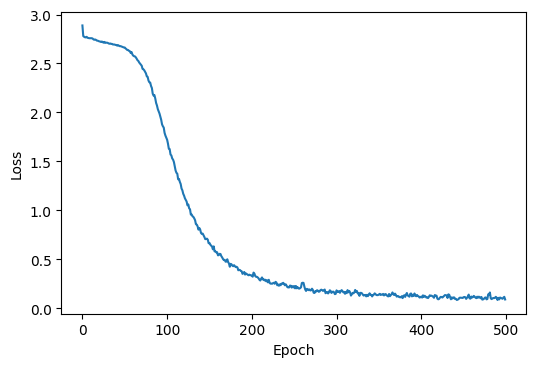

In [27]:
plt.figure(dpi=100)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(500), history.history['loss']);

In [43]:
best_n = np.argsort(model.predict(X_test), axis=1)[:,-5:]

In [45]:
correct = 0
for i, y in enumerate(np.argmax(y_test, axis=1)):
    if y in best_n[i]:
        correct += 1

print(float(correct) / len(y_test))

0.41051314142678347


In [46]:
best_n = np.argsort(model.predict(X_test), axis=1)[:,-3:]
correct = 0
for i, y in enumerate(np.argmax(y_test, axis=1)):
    if y in best_n[i]:
        correct += 1

print(float(correct) / len(y_test))

0.2878598247809762
